# Unsupervised Learning - Clustering

## Introduction

This workshop consists of some reading, executing and understanding the code. Each section is then followed up by a task to complete. There are 4 tasks in this workshop.

Please read through this code and answer questions and/or complete the code as indicated in **tasks**

This "walk-through" lab will give some examples of the unsupervised learning methods covered in lectures. We apply $k$-means clustering, as well as the EM algorithm discussed in lectures. We finish with some toy examples of some other clustering algorithms we did not cover but which you may find useful.

### Acknowledgement

This notebook was originally designed for UNSW Machine Learning lab with Dr Michael Bain as the Leturer in Charge.

*This notebook contains several excerpts from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the original content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).* 

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*


## Overview

The objective is to expose some of the methods and to show some visualizations, since this is a key aspect of dimensionality reduction and clustering. We will use the ``Seaborn`` visualization package which builds on and extends the capabilities of the standard ``Matplotlib`` package. *You will need to install these if you want to run this notebook locally.*

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import pandas as pd
# pandas.__version__


## k-Means Clustering with Expectation-Maximization approach

Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.
Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is an algorithm known as *k-means clustering*, which is implemented in ``sklearn.cluster.KMeans``.

### A simple demostration of k-Means

**Please execute this code and walk through it to undestand how does it work.**

The *k*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.
It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean (centroid) of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the *k*-means model.
We will soon dive into exactly *how* the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the *k*-means result.

First, let's generate a two-dimensional dataset containing four distinct blobs.
To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters.
The *k*-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

In [ ]:
#### Note: if you find an error when executing this code: attributeerror: 'nonetype' object has no attribute 'split'
#####  try to do these
# !pip unstall threadpoolctl
###### if it stops for a long time, reset the kernel, and do this:
# !pip install threadpoolctl==3.1.0

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
# the following function combine the fit function and the predict function into one function
y_kmeans1 = kmeans.fit_predict(X)

Let's visualize the results by plotting the data colored by these labels.
We will also plot the cluster centers as determined by the *k*-means estimator:

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

The good news is that the *k*-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye.
But you might wonder how this algorithm finds these clusters so quickly! After all, the number of possible combinations of cluster assignments is exponential in the number of data points—an exhaustive search would be very, very costly.
Fortunately for us, such an exhaustive search is not necessary: instead, the typical approach to *k*-means involves an intuitive iterative approach known as *expectation–maximization*.

### k-Means Algorithm: Expectation–Maximization

**Please read through to understand the Expectation=maximization concept.**

Pay attention how k-Means works as an EM algorithm. A task to complete will follow.

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science.
*k*-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here.
In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean 

Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to.
The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

We can visualize the algorithm as shown in the following figure.

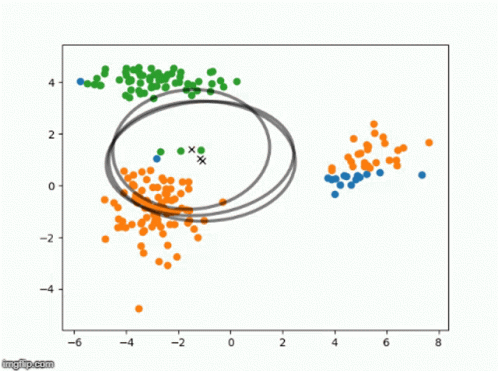














For the particular initialization shown below, the clusters converge in just three iterations.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2) # first random centres

def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers) #cluster number as min dist of point x to a cluster
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)]) # mean for each cluster
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)

# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)

The *k*-Means algorithm is simple enough that we can write it in a few lines of code.
The following will be a very basic implementation.

### Task 1. Complete missing code for the find_clusters function

Complete and run the code. Test if the code runs properly by observing the 4 clearly separated clusters in different colours.

Work in groups to think together how to complete this task efficiently.

In [ ]:
# loop until centresbecome stable
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = < your code here ?
        
        # 2b. Find new centers from means of points
        new_centers = < your code here >
        
        # 2c. Check for convergence. If converged, exit the loop
        < your code here >
        
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Task 2: Caveats of expectation–maximization

There are a few issues to be aware of when using the expectation–maximization algorithm in genral and k_Means in particular.

**In your groups, find at least 2 k-Means limitations and prepare to discuss them in the class**

Note: these limitations were discussed in the lecture W7





### Demostration of usefullness of clustering: k-means on digits

**Read, execute and understand the following application of clustering.**

To start, let's take a look at applying *k*-means on the same simple digits data that we saw above.

You will find that even without any knowledge which data forms which digit, the clustering is able to separate most of the digits correctly.

Here we will attempt to use *k*-means to try to identify similar digits *without using the original label information*; this might be similar to a first step in extracting meaning from a new dataset about which you don't have any *a priori* label information.

We will start by loading the digits and then finding the ``KMeans`` clusters.
Recall that the digits consist of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

The clustering can be performed as we did before:

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

The result is 10 clusters in 64 dimensions.
Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster (i.e., the centroid is a "digit").
Let's see what these cluster centers look like:

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that *even without the labels*, ``KMeans`` is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

Because *k*-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted.
We can fix this by matching each learned cluster label with the true labels found in them:

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:

In [ ]:
# The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and 
# counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
from sklearn.metrics import accuracy_score,adjusted_rand_score
print(accuracy_score(digits.target, labels))
print(adjusted_rand_score(digits.target, labels))

With just a simple k-means algorithm, we discovered the correct grouping for 80% of the input digits! 

## Comparing different clustering algorithms on toy datasets

**Read, execute the code to see which clustering algorithm performs better on which dataset.**


here many clustering algorithsm we did not cover. The following example aims at showing characteristics of some other clustering algorithms on datasets that are "interesting" but still in 2D. The last dataset is an example of a 'null' situation for clustering: the data is homogeneous, and there is no good clustering.

**DBSCAN** requires two parameters: ε (eps) and the minimum number of points required to form a dense region[a] (minPts). It starts with an arbitrary starting point that has not been visited. This point's ε-neighborhood is retrieved, and if it contains sufficiently many points, a cluster is started. Otherwise, the point is labeled as noise. Note that this point might later be found in a sufficiently sized ε-environment of a different point and hence be made part of a cluster. If a point is found to be a dense part of a cluster, its ε-neighborhood is also part of that cluster. Hence, all points that are found within the ε-neighborhood are added, as is their own ε-neighborhood when they are also dense. This process continues until the density-connected cluster is completely found. Then, a new unvisited point is retrieved and processed, leading to the discovery of a further cluster or noise.

**Mini-batch k-means** the most computationally costly step is conducted on only a random sample of observations as opposed to all observations. This approach can significantly reduce the time required for the algorithm to find convergence (i.e. fit the data) with only a small cost in quality.

**AffinityPropagation** Does not require to know k number, it can find clusters based on "communication" between data points. All datapoints "communicate" to collectively find who is the best exemplar of the cluster based on some distance measure. Datapoints form a network, where each point is connected to all other points. A good explanation can be found here: https://www.ritchievink.com/blog/2018/05/18/algorithm-breakdown-affinity-propagation/

The **mean shift** algorithm is a nonparametric clustering technique which does not require prior knowledge of the number of clusters, and does not constrain the shape of the clusters. It requires, however, Kernel Density Estimation, which is usually Gaussian distribution. Depending on the distibution parameters (mean, std) the distribution covers more or less points, resulting in more or less number of clusters. More explanation can be found here: https://spin.atomicobject.com/2015/05/26/mean-shift-clustering/


**BIRCH (balanced iterative reducing and clustering using hierarchies)** is an unsupervised data mining algorithm used to perform hierarchical clustering over particularly large data-sets. It is local in that each clustering decision is made without scanning all data points and currently existing clusters. It exploits the observation that data space is not usually uniformly occupied and not every data point is equally important. It makes full use of available memory to derive the finest possible sub-clusters while minimizing I/O costs. It is also an incremental method that does not require the whole data set in advance.

**Gaussian Mixture** (GMMs) are often used for data clustering. You can use GMMs to perform either hard clustering or soft clustering on query data. 

To perform hard clustering, the GMM assigns query data points to the multivariate normal components that maximize the component posterior probability, given the data. That is, given a fitted GMM, cluster assigns query data to the component yielding the highest posterior probability. Hard clustering assigns a data point to exactly one cluster. For an example showing how to fit a GMM to data, cluster using the fitted model, and estimate component posterior probabilities. 

Additionally, you can use a GMM to perform a more flexible clustering on data, referred to as soft (or fuzzy) clustering. Soft clustering methods assign a score to a data point for each cluster. The value of the score indicates the association strength of the data point to the cluster. As opposed to hard clustering methods, soft clustering methods are flexible because they can assign a data point to more than one cluster. When you perform GMM clustering, the score is the posterior probability
While these examples give some intuition about the algorithms, this intuition might not apply to very high dimensional data.

The results could be improved by tweaking the parameters for each clustering strategy, for instance, setting the number of clusters for the methods that need this parameter specified. Note that affinity propagation has a tendency to create many clusters. Thus in this example its two parameters (damping and per-point preference) were set to mitigate this behavior.

Run the code, inspect the visualizations, and read up a bit on the algorithms to try and understand
what is going on!
**Which algorithm performs the best clustering for this data?**

In [ ]:
print(__doc__)

%matplotlib inline

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)


np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

clustering_names = [
    'MiniBatchKMeans', 'AffinityPropagation', 'MeanShift',
    'DBSCAN', 'Birch']

plt.figure(figsize=(len(clustering_names) * 2 + 3, 9.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

datasets = [noisy_circles, noisy_moons, blobs, no_structure]
for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # create clustering estimators
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    
    two_means = cluster.MiniBatchKMeans(n_clusters=2)
    
    ward = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward',
                                           connectivity=connectivity)
    
    dbscan = cluster.DBSCAN(eps=.2)
    
    affinity_propagation = cluster.AffinityPropagation(damping=.9,
                                                       preference=-200)

    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock", n_clusters=2,
        connectivity=connectivity)

    birch = cluster.Birch(n_clusters=2)
    
    gm = GaussianMixture(n_components=2, random_state=0)
#     bgm = BayesianGaussianMixture(n_components=2, random_state=0)
    
    clustering_algorithms = [
        two_means, affinity_propagation, ms,
        dbscan, birch]

    for name, algorithm in zip(clustering_names, clustering_algorithms):
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        # plot
        plt.subplot(4, len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

### Task 3: Add GMM (Gaussian Mixture Model) to above evaluation code

Given that GMM has a few nice properties, it may be interesting to find out how it performs comparing to other models evaluated in the above code. Please figure out how to add GMM to the list and to display and compare the result.

Discuss how GMM compares with other models.

### Task 4: Apply DBScan to a new dataset

Fill in missing code in the below evaluation of clustering.

Run the code, wiew and discuss the results.

1. Are the clusters clearly deparated?
2. What they are tell you about the data?
3. How the outliers/noise were identified and excluded. You can use discussion on this topic from the lecture W7.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
X_train = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# complete the code here 
clustering = < your code >
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 

In [ ]:
outliers = ## separate outliers here as those points where Cluster is -1
fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',

                data= <put the rest (non outliers) data here,

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot(x='Age', y='Spending Score (1-100)',

                data=<put the rest (non outliers) data here,

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")

axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()

**This completes the workshop. Thank you.**